# **Imports 📢**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy
from tqdm import tqdm

# **Dataset 🗂️**

In [2]:
!unzip ./data/data.zip -d ./data/

Archive:  ./data/data.zip
  inflating: ./data/housing.csv      


## Read Dataset

In [68]:
dataset = pd.read_csv('./data/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
dataset.drop('ocean_proximity', axis=1, inplace=True)

In [70]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [71]:
len(dataset), dataset.shape

(20640, (20640, 9))

## Split

In [72]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X.shape, y.shape

((20640, 8), (20640,))

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2222)
print(f"Train: {len(x_train) / len(dataset) * 100} %")
print(f"Test: {len(x_test) / len(dataset) * 100} %")
print(f"Valid: {len(x_valid) / len(dataset) * 100} %")

Train: 70.0 %
Test: 10.0 %
Valid: 20.0 %


In [74]:
x_train = torch.FloatTensor(x_train.values)
y_train = torch.FloatTensor(y_train.values)

x_valid = torch.FloatTensor(x_valid.values)
y_valid = torch.FloatTensor(y_valid.values)

x_test = torch.FloatTensor(x_test.values)
y_test = torch.FloatTensor(y_test.values)

## Preprocess

In [75]:
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)
mu, std

(tensor([-119.5726,   35.6293,   28.6901, 2626.9998,  536.9239, 1425.0244,
          498.7928,    3.8692]),
 tensor([2.0014e+00, 2.1290e+00, 1.2594e+01, 2.1672e+03, 4.1958e+02, 1.1504e+03,
         3.8209e+02, 1.8942e+00]))

In [76]:
x_train = (x_train - mu) / std
x_valid = (x_valid - mu) / std
x_test = (x_test - mu) / std

In [78]:
mu_y = y_train.mean()
std_y = y_train.std()

In [80]:
y_train = (y_train - mu_y) / std_y
y_valid = (y_valid - mu_y) / std_y
y_test = (y_test - mu_y) / std_y

## Dataloader

In [81]:
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
valid_dataset = TensorDataset(x_valid, y_valid)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256)

# **Model 🧠**

In [118]:
num_feats = 8
out_feat = 1

h1 = 64
h2 = 32

model = nn.Sequential(
    nn.Linear(num_feats, h1),
    nn.ReLU(),
    nn.Linear(h1, h2),
    nn.ReLU(),
    nn.Linear(h2, out_feat)
)

# **Device ⚙️**

In [99]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
model = model.to(device)

# **Loss ⚖️**

## MSELoss

In [100]:
loss_fn = nn.MSELoss()

## L1Loss

In [111]:
loss_fn = nn.L1Loss()

## HuberLoss

In [119]:
loss_fn = nn.HuberLoss()

## AdaptiveLoss

# **Optimizer📻**

## Adam

## SGD

In [120]:
optimizer = optim.SGD(model.parameters(),
                      lr=0.01)

## SGD_M

## SGD_Nest

## rmsprop

# **Utils 🧰**

In [114]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# **Train Loop👨🏼‍🏫**

In [121]:
loss_train_hist = []
loss_valid_hist = []

num_epochs = 200

for epoch in range(num_epochs):
  # Train
  model.train()
  loss_train = AverageMeter()
  for i, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)
    loss = loss_fn(outputs, targets.unsqueeze(1))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_train.update(loss.item())

  loss_train_hist.append(loss_train.avg)

  # Validation
  model.eval()
  loss_valid = AverageMeter()

  with torch.no_grad():
    for i, (inputs, targets) in enumerate(valid_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs, targets.unsqueeze(1))

      loss_valid.update(loss.item())

    loss_valid_hist.append(loss_valid.avg)

  if epoch % 10 == 0:
    print(f'Epoch {epoch}')
    print(f'Train: Loss = {loss_train.avg:.4}')
    print(f'Valid: Loss = {loss_valid.avg:.4}')
    print()

Epoch 0
Train: Loss = 0.398
Valid: Loss = 0.3616

Epoch 10
Train: Loss = 0.1614
Valid: Loss = 0.1567

Epoch 20
Train: Loss = 0.1434
Valid: Loss = 0.1383

Epoch 30
Train: Loss = 0.134
Valid: Loss = 0.1307

Epoch 40
Train: Loss = 0.1281
Valid: Loss = 0.1271

Epoch 50
Train: Loss = 0.1242
Valid: Loss = 0.1227

Epoch 60
Train: Loss = 0.1215
Valid: Loss = 0.1214

Epoch 70
Train: Loss = 0.1193
Valid: Loss = 0.1184

Epoch 80
Train: Loss = 0.1176
Valid: Loss = 0.1171

Epoch 90
Train: Loss = 0.1161
Valid: Loss = 0.1155

Epoch 100
Train: Loss = 0.1146
Valid: Loss = 0.1134

Epoch 110
Train: Loss = 0.1133
Valid: Loss = 0.1146

Epoch 120
Train: Loss = 0.1121
Valid: Loss = 0.1115

Epoch 130
Train: Loss = 0.1109
Valid: Loss = 0.1101

Epoch 140
Train: Loss = 0.1097
Valid: Loss = 0.1097

Epoch 150
Train: Loss = 0.1088
Valid: Loss = 0.1102

Epoch 160
Train: Loss = 0.1079
Valid: Loss = 0.1095

Epoch 170
Train: Loss = 0.107
Valid: Loss = 0.1081

Epoch 180
Train: Loss = 0.1061
Valid: Loss = 0.1082

Epoch 1

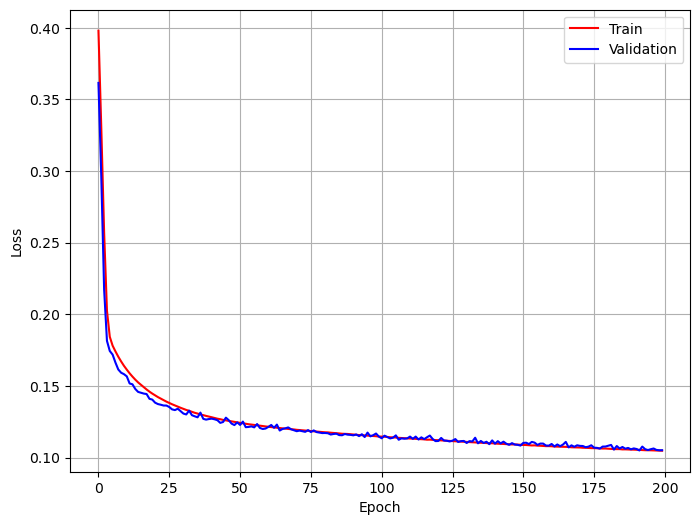

In [122]:
plt.figure(figsize=(8, 6))

plt.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
plt.plot(range(num_epochs), loss_valid_hist, 'b-', label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

In [107]:
!mkdir ./out/

In [ ]:
optimizer_name = 'adam'

torch.save(torch.tensor(loss_train_hist),
           f'./out/{optimizer_name}-loss-train.pt')
torch.save(torch.tensor(loss_valid_hist),
           f'./out/{optimizer_name}-loss-valid.pt')

# **Comparison🔎**

## Plot

In [ ]:
def plot_lcs(x:str, y:str):
  plt.figure(figsize=(8, 6))
  #
  for optim in ['sgd', 'sgd-m', 'sgd-nest', 'rms', 'adam']:
    z = torch.load(f'save/{optim}-{x}-{y}.pt')
    #
    plt.plot(range(num_epochs), z, label=optim)
    plt.xlabel('epoch')
    plt.ylabel(f'{x} {y}')
    plt.grid(True)
    plt.legend()

In [ ]:
plot_lcs('acc', 'valid')

## R2 score

In [123]:
import numpy as np
np.mean(loss_train_hist)

0.12280888194976523

Loss     | MSELoss  | N1Loss | HuberLoss | AdaptiveLoss
---------| :-----: | :-----: | :-----: | :-----:
R2 score | 0.2319 | 0.3255 | 0.1228 |